# Training an reinforcement learning agent with the tensorforce-framework on an GEM environment

This notebook serves as an educational introduction to the usage of tensorforce using a gym-electric-motor (GEM) environment. The goal of this notebook is to give an understanding of what tensorforce is and how to use it to train and evaluate an reinforcement learning agent that can solve a current control problem of the GEM toolbox.

The following code snippets are only needed if you are executing this file directly from a cloned GitHub repository where you don't have GEM installed

########################

A new important topic in the field of machine learning is the so-called reinforcement learning. The priciple of algorithms, that learn by itself through reinforcement, how to solve different problems opened a lot new application areas for machine learning. <br>
The basic idea behind reinforcement learning is pictured in *figure 1*. An agent learn to act in an given environment, by taken observation on the environment states and receiving some reward value for the actions already taken by the agent.

A quite new, interesting area for reinforcement learning is the controller design for electrical drives. The idea behind this area is that the agent should learn by itself to control for example the speed of an electrical drive.


## 1. The very basic in Deep-Reinforcement-Learning
    - why deep learning/ why/use (of) neural net 
    - intuition behind q-learning, dqn's
    
    
    - literature references: paper from deepmind (dqn), barto-sutton book

To combine reinforcement learning and deep neural networks a 


- rl agents oft gute leistung
- vorteil von deep NNs ausnutzen (wegen großen state spaces)
- deep rl
- new agent dqn
- basis auf q learning 
- off policy
- genaueres über dqn in deepmind paper

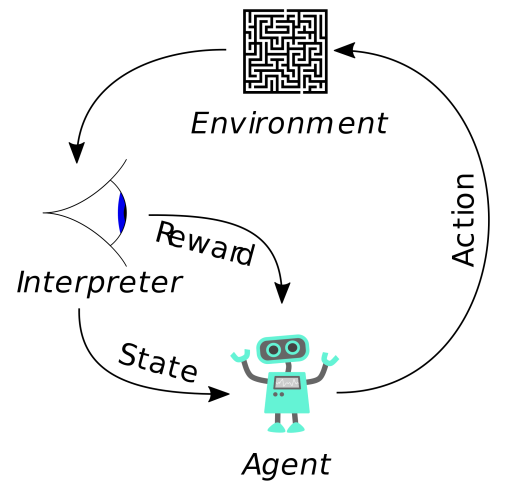

[beispiel für link](https://github.com/upb-lea/gym-electric-motor)

"insert introduction for notebook"

    - link to git repo/ docu
    - explanation to framework

## 1. What you need/ Requirements

Before you can start you need to make sure that you have both gym-electric-motor and tensorforce installed. You can install both easily using pip:

  - pip install gym-electric-motor
  - pip install tensorforce

Alternatively, you can install their latest developer version directly from GitHub:

  - [GitHub Gym-Electric-Motor](https://github.com/upb-lea/gym-electric-motor)
  - [GitHub Tensorforce](https://github.com/tensorforce/tensorforce)

You also need to make sure that numpy and gym are installed. You can install both using pip, too. After you have done that you should be able to execute the following cells without any problems.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

#################### necessary ???????

## 2 Setting up the GEM-Environment

To train an reinforcement-learning agent, an environment to interact with is necessary. For this purpose, we use the gym-electric-motor toolbox, which offers different electrical-drive environments.

###############

This notebook does not focus directly on the usage of GEM and how to set up a GEM environment. If you are new to GEM and interested in finding out what it does and how to use it, we recommend taking a look at the educational notebook which is dealing with GEM.

To save space in this notebook, we will use a function defined in an external Python file called setting_environment.py. If you are interested to see how we defined our environment's parameters you can take a look at that file. By simply calling the **set_env()** function from the external file, you can set up our used environment for a *Permanent Magnet Synchronous Motor* with discrete inputs.

To set up the environment for a permanent-magent-sychronous-machine
- set up from pmsm mit basic parametern, 
- benutzen von constaint monitor oder nur das was in master ??
- generell code auf basis von master oder nightly (der bald master wird)
- initializer ? 

- explain: setup, environment, parameters, refer to gem-notebook example
- link to docu, github
    


In [8]:
#from gym_electric_motor.core import Callback
#class RewardLogger(Callback):
#    def __init__(self):
#        self._step_rewards = []
#        self._mean_episode_rewards = []
#
#    def on_step_end(self):
#        self._step_rewards.append(self._env._reward)
#    
#    def on_reset_begin(self):
#        self._mean_episode_rewards.append(np.mean(self._step_rewards))
#        self._step_rewards = []
#        
#    def on_close(self):
#        np.save(Path.cwd() / "saved_agents" / "EpisodeRewards.npy", 
#                np.array(self._mean_episode_rewards))

In [2]:
"""
time_limit(bool):

restliche params erklären ??

"""
from setting_environment import set_env

env = set_env(training=True)#, callbacks=[RewardLogger()])

## 3. Using Tensorforce

To take advantage of some already implemented deep-rl agents, we use the *tensorforce-framework*. It is build on *tensorflow* and offers agents based on deep Q-networks, policy gradients or actor-critic algorithms. 

For more information to specific agents or different modules that can be used, some good explanations can be found in the corresponding [documentation](https://tensorforce.readthedocs.io/en/latest/)
   
In the following we use a deep Q-network to accomplish the control task. (?????????)


### 3.1 Defining an Tensorforce-Environment

If you are using tensorforce, you need to define a *tensorforce-environment*. This is done by simply by using the *Environment.create* interface. This takes your normal *gym-like* environment with some additional arguments

In [3]:
from tensorforce.environments import Environment

# maximal timesteps per episode for training 
max_episode_steps = 10000
# creating tensorforce environment
tf_env = Environment.create(environment=env,
                            max_episode_timesteps=max_episode_steps)

### 3.2 Setting-up an Tensorforce-Agent

The Agent is created just like the environment. The agent's parameters can be passed as arguments from the create function or via a configuration as dictionary or as *.json* file.
In the following the way via a dictionary is used.

With the *tensorforce-framework* it is possible to define a own network architecture, like it is shown in the code snippet. For some parameters it can be usefull to haven a decaying value during the training. A possible way for this is also shown in the following code.



quellen:

https://www.nature.com/articles/nature14236
https://arxiv.org/abs/1312.5602

http://www.incompleteideas.net/book/the-book-2nd.html


In [4]:
"""
hyperparameter for agent_config:

    memory: size of replay-buffer
    batch_size: size of mini-batch used for training
    network: net-architect for dqn
    update_frequency: Frequency of updates
    start_updating: memory warm-up steps
    learning_rate for optimizer
    discount: gamma/ discount of future rewards
    target_sync_frequency: Target network gets updated 'sync_freq' steps
    target_update_weight: weight for target-network update

"""

"\nhyperparameter for agent_config:\n\n    memory: size of replay-buffer\n    batch_size: size of mini-batch used for training\n    network: net-architect for dqn\n    update_frequency: Frequency of updates\n    start_updating: memory warm-up steps\n    learning_rate for optimizer\n    discount: gamma/ discount of future rewards\n    target_sync_frequency: Target network gets updated 'sync_freq' steps\n    target_update_weight: weight for target-network update\n\n"

In [5]:
# using a parameter decay for the exploration
epsilon_decay = {'type': 'decaying',
                 'decay': 'polynomial',
                 'decay_steps': 50000,
                 'unit': 'timesteps',
                 'initial_value': 1.0,
                 'decay_rate': 5e-2,
                 'final_value': 5e-2,
                 'power': 3.0}

# defining a simple network architecture
net = [
    dict(type='dense', size=64, activation='relu'),
    dict(type='dense', size=64, activation='relu'),
]

# defining the parameters of an dqn-agent
agent_config = {
    'agent': 'dqn',
    'memory': 200000,
    'batch_size': 25,
    'network': net,
    'update_frequency': 1,
    'start_updating': 10000,
    'learning_rate': 1e-4,
    'discount': 0.99,
    'exploration': epsilon_decay,
    'target_sync_frequency': 1000,
    'target_update_weight': 1.0,
    }

In [6]:
from tensorforce.agents import Agent

training_steps = 500000
# creating agent via dictionary
dqn_agent = Agent.create(agent=agent_config, environment=tf_env)


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## 3.2 Training the agent

The training of the agent **(doppel the)** is executed with the *tensorforce-runner*. The runner stores metrics during the training, like the reward per episode, and can used to save learned agents.

In [7]:
from tensorforce.execution import Runner

# create and train the agent
runner = Runner(agent=dqn_agent, environment=tf_env)
runner.run(num_timesteps=training_steps)

Timesteps:  99%|█████████▉| 494546/500000 [32:30<00:21, 251.77it/s, mean_reward=n/a]

In [11]:
vars(runner)

{'environments': [<tensorforce.environments.environment.EnvironmentWrapper at 0x7f2755cfd550>],
 'is_environment_external': True,
 'is_environment_remote': False,
 'evaluation': False,
 'is_agent_external': True,
 'agent': <tensorforce.agents.dqn.DeepQNetwork at 0x7f272a6d8b90>,
 'num_episodes': inf,
 'num_timesteps': 500000,
 'num_updates': inf,
 'batch_agent_calls': False,
 'sync_timesteps': False,
 'sync_episodes': False,
 'num_sleep_secs': 0.001,
 'callback_episode_frequency': 1,
 'callback_timestep_frequency': inf,
 'callback': <function tensorforce.execution.runner.Runner.run.<locals>.tqdm_callback(runner, parallel)>,
 'episode_rewards': [-2198.682542418682,
  -13453.01080032415,
  -3056.684742319916,
  -4072.211177874911,
  -2653.6693655994654,
  -2531.8075842878607,
  -2216.5036746692263,
  -6350.266203968341,
  -4530.860143058694,
  -2980.2151046230497,
  -2639.940050270041,
  -2426.9987877118506,
  -2750.4500941123038,
  -3032.355312821868,
  -2390.9809775368226,
  -2727.8721

In [ ]:
agent_path = 'saved_agents'
agent_name = 'dqn_64_64'
runner.agent.save(directory=agent_path, filename=agent_name)
runner.close()

print('\n agent saved \n')
print(f'\n Execution time of tensorforce dqn-training is:'
      f' 'f'{end_time-start_time:.2f} seconds \n ')


In [ ]:
# creating agent via dictionary
dqn_agent = Agent.create(agent=agent_config, environment=tf_env)
# create agent trainer
runner = Runner(agent=dqn_agent, environment=tf_env)
# time training
runner.run(num_timesteps=simulation_steps)



In [ ]:
agent_path = 'saved_agents'
agent_name = 'dqn_64_64'
runner.agent.save(directory=agent_path, filename=agent_name)
runner.close()

print('\n agent saved \n')
print(f'\n Execution time of tensorforce dqn-training is:'
      f' 'f'{end_time-start_time:.2f} seconds \n ')


In [ ]:
# defining parameters for dqn-agent


"""
hyperparameter for agent_config:

    memory: size of replay-buffer
    batch_size: size of mini-batch used for training
    network: net-architect for dqn
    update_frequency: Frequency of updates
    start_updating: memory warm-up steps
    learning_rate for optimizer
    discount: gamma/ discount of future rewards
    target_sync_frequency: Target network gets updated 'sync_freq' steps
    target_update_weight: weight for target-network update

"""
epsilon_decay = {'type': 'decaying',
                 'decay': 'polynomial',
                 'decay_steps': 50000,
                 'unit': 'timesteps',
                 'initial_value': 1.0,
                 'decay_rate': 5e-2,
                 'final_value': 5e-2,
                 'power': 3.0}
net = [
    dict(type='dense', size=64, activation='relu'),
    dict(type='dense', size=64, activation='relu'),
    #dict(type='linear', size=7)
]

agent_config = {
    'agent': 'dqn',
    'memory': 200000,
    'batch_size': 25,
    'network': net,
    'update_frequency': 1,
    'start_updating': 10000,
    'learning_rate': 1e-4,
    'discount': 0.99,
    'exploration': epsilon_decay,
    'target_sync_frequency': 1000,
    'target_update_weight': 1.0}


In [ ]:
# creating the agent
dqn_agent = Agent.create(agent=agent_config, environment=tensor_env)


## 3.3 Training the Agent

"explaining parameters, usage, possibilities to save and load models"

In [ ]:
# creating tensorforce-runner to train the agent
runner = Runner(agent=dqn_agent, 
                environment=tensor_env, 
                evaluation=True)
runner.run(num_timesteps=simulation_steps)

In [ ]:
vars(runner)

## 4. Evaluating the trained Agent

" explaining evaluation loop and metrics"

"visualizing metrics"